Question Number 1: Data Exploration of tandem data
About Dataset: Trip Duration (seconds) , Start Time and Date , End Time and Date ,
Start Station ID , Start Station Name , Start Station Latitude , Start Station Longitude , End
Station ID , End Station Name, End Station Latitude , End Station Longitude , Bike ID ,
User Type (Subscriber or Customer – “Subscriber” = Member or “Customer” = Casual) ,
Member Year of Birth, Member Gender

a. Read the entire dataset using pandas dataframe and build the file by appending each file in an optimized manner

b. What was the time duration for the average trip taken? (Use plotting techniques and write your observations for the same.)

c. Is there any correlation between the months and the trip duration? Use scatter plot and comment your observations from the plot

d. Do seasons affect the duration of a trip ? Comment your observations.

e. Using multivariate exploration, explain whether there is any relation between short trips and the users.

In [3]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np

a. Read the entire dataset using pandas dataframe and build the file by appending each file in an optimized manner

In [4]:
df1=pd.read_csv("201803-fordgobike-tripdata.csv")
df2=pd.read_csv("201807-fordgobike-tripdata.csv")
df3=pd.read_csv("201811-fordgobike-tripdata.csv")
df4=pd.read_csv("201812-fordgobike-tripdata.csv")

In [5]:
df=pd.concat([df1,df2,df3,df4])

b. What was the time duration for the average trip taken? (Use plotting techniques and write your observations for the same.)

In [6]:
avgdur=df['duration_sec'].mean()
print(avgdur)
df['tripduration_min']=df['duration_sec']//60

834.4304272507298


In [7]:
df['tripduration_hours']=pd.to_datetime(df['duration_sec'], unit='s')
df['tripduration_hours'] = df['tripduration_hours'].dt.strftime('%M')
avgdur=pd.to_datetime(avgdur, unit='s')


In [8]:
avgdur = avgdur.strftime('%H:%M:%S')
print("Averge Travel Duration :",avgdur)

Averge Travel Duration : 00:13:54


c. Is there any correlation between the months and the trip duration? Use scatter plot and comment your observations from the plot

In [9]:
df['start_time']=pd.to_datetime(df['start_time'])
df["month"]=df['start_time'].dt.month

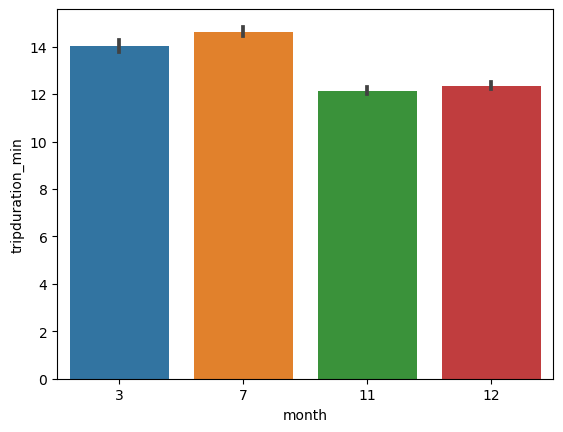

In [10]:

sns.barplot(x=df['month'],y=df['tripduration_min'])
plt.show()

-0.0235953147374796


<Axes: xlabel='duration_sec', ylabel='Month'>

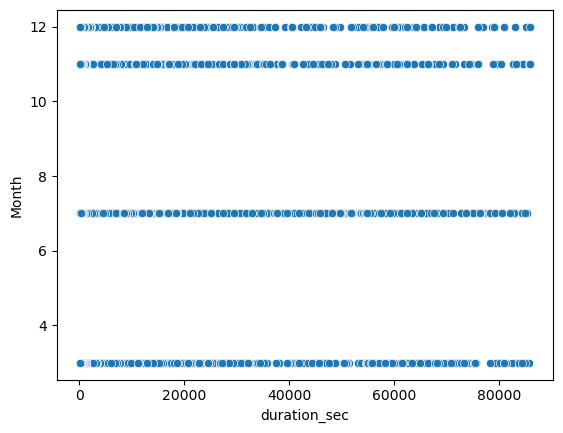

In [11]:
df['start_time']=pd.to_datetime(df['start_time'])
df["Month"]=df['start_time'].dt.month
print(df['duration_sec'].corr(df['Month']))
#There is no correlation between tripduration and month
sns.scatterplot(x=df['duration_sec'],y=df['Month'],markers='o')

There is no correaltion between Month and Duration.

d. Do seasons affect the duration of a trip ? Comment your observations.

In [12]:
def seasondist(month):
    if month >=3 and month<6:
        return 'Spring'
    elif month >=6 and month<9: 
        return 'Summer'
    elif month >=9 and month<12: 
        return 'Fall'
    else: 
        return 'Winter'

df['season']=df['Month'].apply(seasondist)

<Axes: xlabel='duration_sec', ylabel='season'>

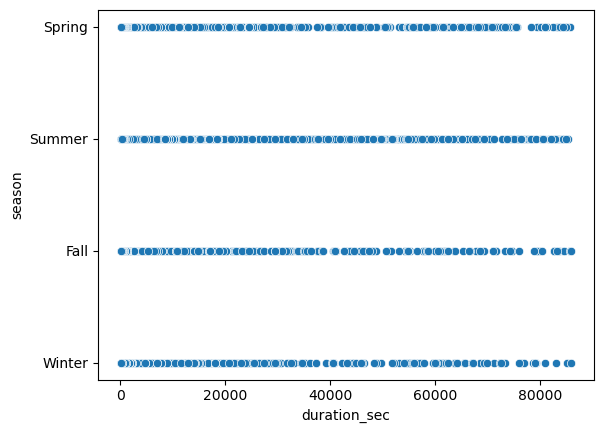

In [13]:
sns.scatterplot(x=df['duration_sec'],y=df['season'])

Season does not affect trip duration.


e. Using multivariate exploration, explain whether there is any relation between short trips and the users.

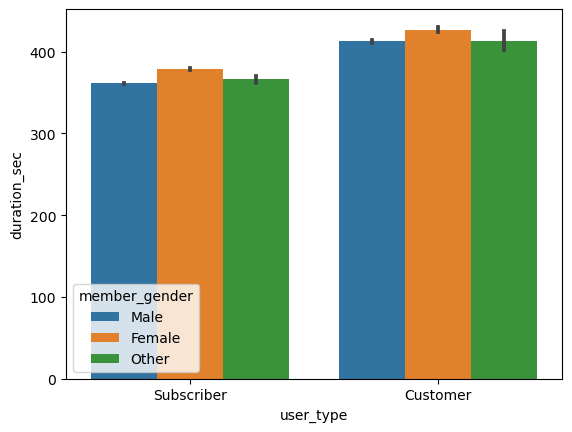

In [15]:
shorttripdf=df.loc[(df['start_station_id']!=df['end_station_id'])]
#we have taken out trips less than 90 seconds on assumption that something was wrong with bike and they have returned it to same staion.
shorttripdf=shorttripdf[(shorttripdf['duration_sec']<=600) & (shorttripdf['duration_sec']>=90)]
sns.barplot(x=shorttripdf['user_type'],y=shorttripdf['duration_sec'], hue=shorttripdf['member_gender'])
plt.show()


Question Number 2:

a. Create a Matrix between 0 and 1, with each value difference of 0.01.

b. Create an array of 20 linearly spaced points between 0 and 1.

c. Create a 5*5 matrix using range 1 to 26, and return sum of the matrix, standard
deviation and sum of all the columns of the matrix.

In [ ]:
matrix=np.arange(0,1,0.01)
matrix=matrix.reshape(10,10)
print(matrix)

[[0.   0.01 0.02 0.03 0.04 0.05 0.06 0.07 0.08 0.09]
 [0.1  0.11 0.12 0.13 0.14 0.15 0.16 0.17 0.18 0.19]
 [0.2  0.21 0.22 0.23 0.24 0.25 0.26 0.27 0.28 0.29]
 [0.3  0.31 0.32 0.33 0.34 0.35 0.36 0.37 0.38 0.39]
 [0.4  0.41 0.42 0.43 0.44 0.45 0.46 0.47 0.48 0.49]
 [0.5  0.51 0.52 0.53 0.54 0.55 0.56 0.57 0.58 0.59]
 [0.6  0.61 0.62 0.63 0.64 0.65 0.66 0.67 0.68 0.69]
 [0.7  0.71 0.72 0.73 0.74 0.75 0.76 0.77 0.78 0.79]
 [0.8  0.81 0.82 0.83 0.84 0.85 0.86 0.87 0.88 0.89]
 [0.9  0.91 0.92 0.93 0.94 0.95 0.96 0.97 0.98 0.99]]


In [ ]:
array=np.arange(0,1,0.05)

print(array)

[0.   0.05 0.1  0.15 0.2  0.25 0.3  0.35 0.4  0.45 0.5  0.55 0.6  0.65
 0.7  0.75 0.8  0.85 0.9  0.95]


In [ ]:
matrix=np.arange(1,26)
matrix=matrix.reshape(5,5)
print(matrix)
print(np.sum(matrix))
print(np.sum(matrix,axis=0))
print(np.sum(matrix,axis=1))
print(np.std(matrix))

[[ 1  2  3  4  5]
 [ 6  7  8  9 10]
 [11 12 13 14 15]
 [16 17 18 19 20]
 [21 22 23 24 25]]
325
[55 60 65 70 75]
[ 15  40  65  90 115]
7.211102550927978


Question Number 3:

import numpy as np

x = np.arange(0,100)

y = x*2

z = x**2

a. Create a figure object and axis of the figure canvas at axis1 = [0,0,1,1]. Provide
necessary labels and title to the plot.

b. Create another plot at axis1 = [0,0,1,1] and axis2 = [0.2,0.5,0.2,0.2]

c. Create a plot by adding two axis object at [0,0,1,1] & [0.2,0.5,0.4,0.4]

d. Use x, y, z array to create the plots

    i. Between x and z arrays

    ii. Between x & y arrays by setting the x-limit in range 20-22 and y-limit range in 30-50

In [ ]:
x = np.arange(0,100)
y = x*2
z = x**2

Text(0.5, 1.0, 'title')

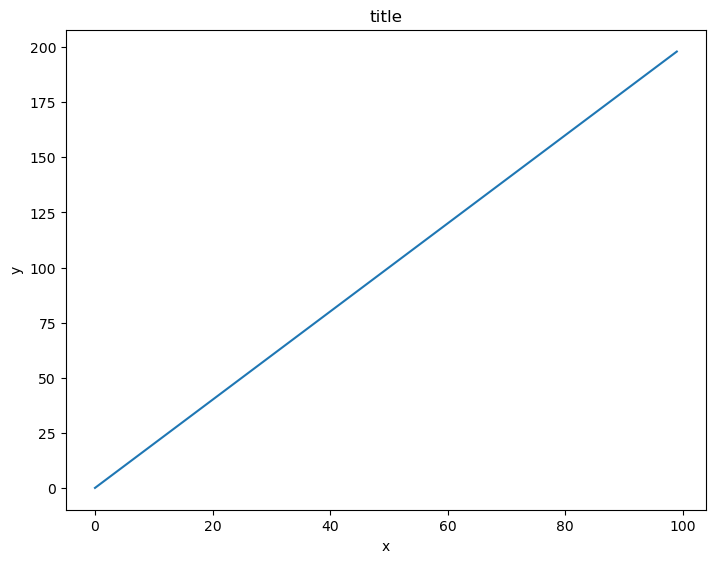

In [ ]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.plot(x,y)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_title('title')

Text(0, 0.5, 'y')

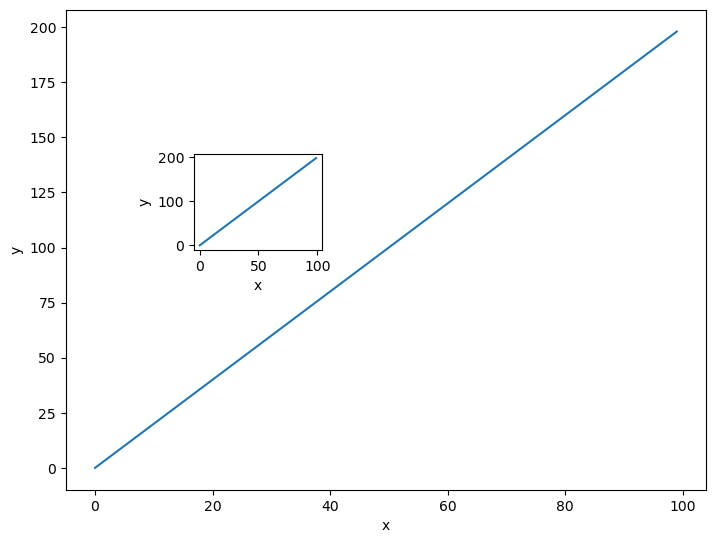

In [ ]:
fig = plt.figure()

ax1 = fig.add_axes([0,0,1,1])
ax2 = fig.add_axes([0.2,0.5,.2,.2])
ax1.plot(x,y)
ax1.set_xlabel('x')
ax1.set_ylabel('y')


ax2.plot(x,y)
ax2.set_xlabel('x')
ax2.set_ylabel('y')

(30.0, 50.0)

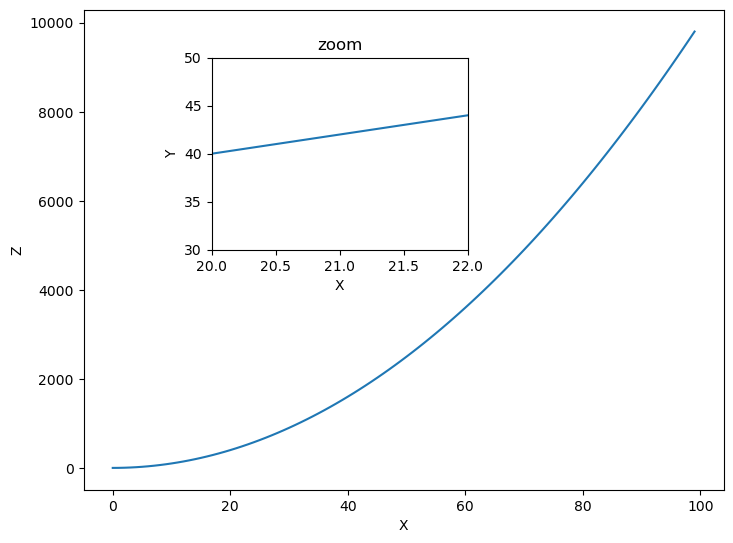

In [ ]:
fig = plt.figure()

ax = fig.add_axes([0,0,1,1])
ax2 = fig.add_axes([0.2,0.5,.4,.4])
ax.plot(x,z)
ax.set_xlabel('X')
ax.set_ylabel('Z')


ax2.plot(x,y)
ax2.set_xlabel('X')
ax2.set_ylabel('Y')
ax2.set_title('zoom')
ax2.set_xlim(20,22)
ax2.set_ylim(30,50)

Question Number 4: The purchase analysis of walmart.

a. What is the average Purchase Price?

b. What were the highest and lowest purchase prices?

c. How many people have English 'en' as their Language of choice on the website?

d. What is the email of the person with the following Credit Card Number: 4926535242672853

e. Someone made a purchase that came from Lot: "90 WT" , what was the Purchase Price for this transaction?

f. How many people have American Express as their Credit Card Provider and made

a purchase above $95 ?

g. How many people have a credit card that expires in 2025?

h. What are the top 5 most popular email providers/hosts (e.g. gmail.com, yahoo.com, etc...) ?

i. What are the 5 most common Job Titles?

j. How many people made the purchase during morning and evening time?

In [ ]:
walmartdf=pd.read_csv('walmart_purchase_data.csv')

In [ ]:
avgprice=walmartdf['Purchase Price'].mean()
print(avgprice)

50.347302


In [ ]:
maxprice=walmartdf['Purchase Price'].max()
minprice=walmartdf['Purchase Price'].min()
print("Max Price",maxprice,"Min Price",minprice)

Max Price 99.99 Min Price 0.0


c. How many people have English 'en' as their Language of choice on the website?

In [ ]:
en=walmartdf[walmartdf['Language']=='en'].count()
print(en[0])
en=walmartdf['Language'].value_counts()
print(en['en'])

1098
1098


d. What is the email of the person with the following Credit Card Number: 4926535242672853

In [ ]:
person=walmartdf[walmartdf['Credit Card']==4926535242672853]
print(person['Email'])

person=walmartdf['Email'].loc[walmartdf['Credit Card']==4926535242672853]
print(person)

1234    bondellen@williams-garza.com
Name: Email, dtype: object
1234    bondellen@williams-garza.com
Name: Email, dtype: object


e. Someone made a purchase that came from Lot: "90 WT" , what was the Purchase Price for this transaction?

In [ ]:
price=walmartdf['Purchase Price'].loc[walmartdf['Lot']=='90 WT']
print(price)

513    75.1
Name: Purchase Price, dtype: float64


f. How many people have American Express as their Credit Card Provider and made a purchase above $95 ?

In [ ]:
cc=walmartdf['CC Provider'].loc[walmartdf['Purchase Price']>95].value_counts()
print(cc['American Express'])

39


g. How many people have a credit card that expires in 2025?

In [ ]:
ccexp=walmartdf['CC Exp Date'].loc[walmartdf['CC Exp Date'].str.contains("25", case=False)].count()
print(ccexp)

1033



h. What are the top 5 most popular email providers/hosts (e.g. gmail.com, yahoo.com, etc...) ?

In [ ]:
import re

def email_provider(email):
    prd=re.findall('@.+\.', email)
    prd= prd[0].strip('@.')
    return prd

walmartdf['Email Provider']=walmartdf['Email'].apply(email_provider)
email_provider= walmartdf['Email Provider'].value_counts()
print(email_provider.head(5))

hotmail     1638
yahoo       1616
gmail       1605
smith         69
williams      55
Name: Email Provider, dtype: int64


i. What are the 5 most common Job Titles?

In [ ]:
job= walmartdf['Job'].value_counts()
print(job.head(5))

Interior and spatial designer    31
Lawyer                           30
Social researcher                28
Purchasing manager               27
Designer, jewellery              27
Name: Job, dtype: int64


j. How many people made the purchase during morning and evening time?

In [ ]:
job= walmartdf['AM or PM'].value_counts()
print(job)

PM    5068
AM    4932
Name: AM or PM, dtype: int64
